In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('r.csv')

,Question ID,Type,Question,ideal answer,Output(Chat-gpt),Output(Gemini1.5 pro),Output(Mistral large),Output(Mistral-8x7b),Output(Qwen 110 b),Formula(Chat GPT),Formula(Gemini1.5 pro),Formula(Mistral large),Formula(Mistral-8x7b),Formula(Qwen 110 b),Chatgpt,Gemini1.5 pro,Mistral large,Mistral-8x7b,Qwen 110 b,Source
0,1,Calculus,"I invest $100,000 in a company for five years,...","For the first question, I accrue interest at t...",0,0,0,0,0,0,1,0,1,1,To calculate the future value of an investment...,Here's how to calculate the future value of yo...,"Sure, I'd be happy to help with that!\n\nFirst...","When interest is compounded semi-annually, it ...",To calculate the future value of your investme...,https://www.math.utah.edu/online/1220/Practice...
1,2,Calculus,Evaluate \n∫_2^3▒∫_(-1)^4▒∫_1^1▒〖4x^2 y-z^3 d...,There really isn’t all that much to this probl...,0,0,0,0,0,1,1,1,1,1,To evaluate the triple integral \n\[\n\int_{2}...,Let's evaluate this triple integral step-by-st...,The innermost integral is ∫\_1^1 4x^2 y - z^3 ...,"To evaluate the given iterated integral, we'll...",The given integral is a triple integral over a...,https://tutorial.math.lamar.edu/Solutions/Calc...
2,3,Calculus,Evaluate\n∫_0^1▒∫_0^(z^2)▒∫_0^3▒〖y cos〖(z〗^5) ...,There really isn’t all that much to this probl...,0,1,1,0,0,1,1,1,0,0,To evaluate the triple integral\n\n\[ \int_{0}...,Let's break down the evaluation of this triple...,"To evaluate the triple integral, we'll start w...","To evaluate the given iterated integral, we'll...",To evaluate the given triple integral\n\n\[ \i...,https://tutorial.math.lamar.edu/Solutions/Calc...
3,4,Calculus,Evaluate \n∭_E▒〖6z^2 dV〗\n where 𝐸 is the regi...,"Okay, let’s start off with a quick sketch of t...",0,0,0,0,0,1,1,0,0,0,"To evaluate the integral \(\iiint_E 6z^2 \, dV...",Here's how to evaluate the triple integral:\n\...,"To evaluate the triple integral, we'll first n...","To evaluate the triple integral, it's often he...",To evaluate the triple integral \(\iiint_E 6z^...,https://tutorial.math.lamar.edu/Solutions/Calc...
4,5,Calculus,Evaluate \n∭_E▒〖3-4xdV〗 where E is the region...,"Okay, let’s start off with a quick sketch of t...",1,0,0,0,0,0,0,0,0,0,To evaluate the triple integral \(\iiint_E (3 ...,Here's how to evaluate the triple integral:\n\...,"To evaluate the triple integral, we'll first n...","To evaluate the triple integral, we can use it...",To evaluate the triple integral \(\iiint_E (3 ...,https://tutorial.math.lamar.edu/Solutions/Calc...


In [5]:
df['Type'].value_counts()

Type
Calculus         10
Algebra          10
Geometry         10
Number Theory    10
Probablity       10
Name: count, dtype: int64

In [6]:
output_col = ['Output(Chat-gpt)', 'Output(Gemini1.5 pro)', 'Output(Mistral large)', 'Output(Mistral-8x7b)', 'Output(Qwen 110 b)']
formula_col = ['Formula(Chat GPT)', 'Formula(Gemini1.5 pro)', 'Formula(Mistral large)', 'Formula(Mistral-8x7b)', 'Formula(Qwen 110 b)']

In [7]:
chatgpt = ['Output(Chat-gpt)', 'Formula(Chat GPT)']
gemini = ['Output(Gemini1.5 pro)', 'Formula(Gemini1.5 pro)']
mistral_large = ['Output(Mistral large)', 'Formula(Mistral large)']
mistral_8x7b = ['Output(Mistral-8x7b)', 'Formula(Mistral-8x7b)']
qwen_110b = ['Output(Qwen 110 b)', 'Formula(Qwen 110 b)']

In [8]:
overall_chatgpt_sum = df[chatgpt[0]].sum() + df[chatgpt[1]].sum()
overall_gemini_sum = df[gemini[0]].sum() + df[gemini[1]].sum()
overall_mistral_large_sum = df[mistral_large[0]].sum() + df[mistral_large[1]].sum()
overall_mistral_8x7b_sum = df[mistral_8x7b[0]].sum() + df[mistral_8x7b[1]].sum()
overall_qwen_110b_sum = df[qwen_110b[0]].sum() + df[qwen_110b[1]].sum()

C:\Users\rudyr\AppData\Local\Temp\ipykernel_16004\3914467151.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=langs)  # Set the x-axis tick labels


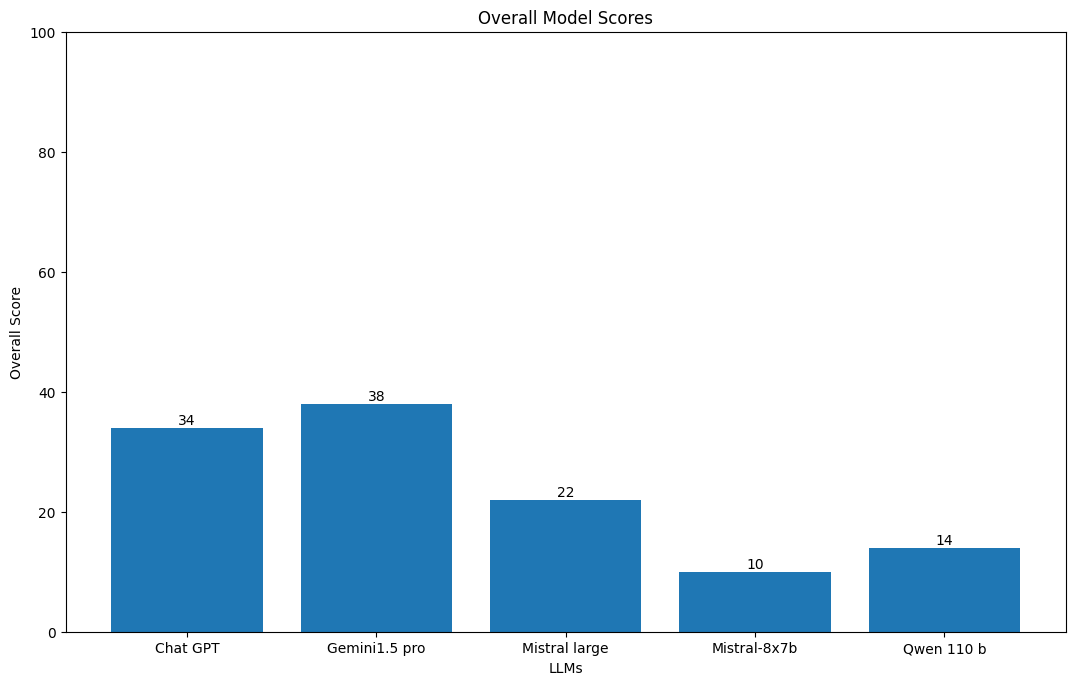

In [14]:
# Graph Parameters
fig = plt.figure(figsize=(10, 6))  # Set the figure size to be presentable in a research paper
ax = fig.add_axes([0, 0, 1, 1])  # Set the axes for the graph
ax.set(ylim=(0, 100))  # Set the y-axis limit to be till 100

# Define the languages and their corresponding scores
langs = ['Chat GPT', 'Gemini1.5 pro', 'Mistral large', 'Mistral-8x7b', 'Qwen 110 b']
students = [overall_chatgpt_sum, overall_gemini_sum, overall_mistral_large_sum, overall_mistral_8x7b_sum, overall_qwen_110b_sum]

# Create the bar graph
bars = ax.bar(langs, students)
ax.set(title='Overall Model Scores', xlabel='LLMs', ylabel='Overall Score')  # Set the title and labels for the graph
ax.set(xticklabels=langs)  # Set the x-axis tick labels

# Add the scores on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height (score) of the bar
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')  # Add text on top of each bar

# Show the plot
plt.show()

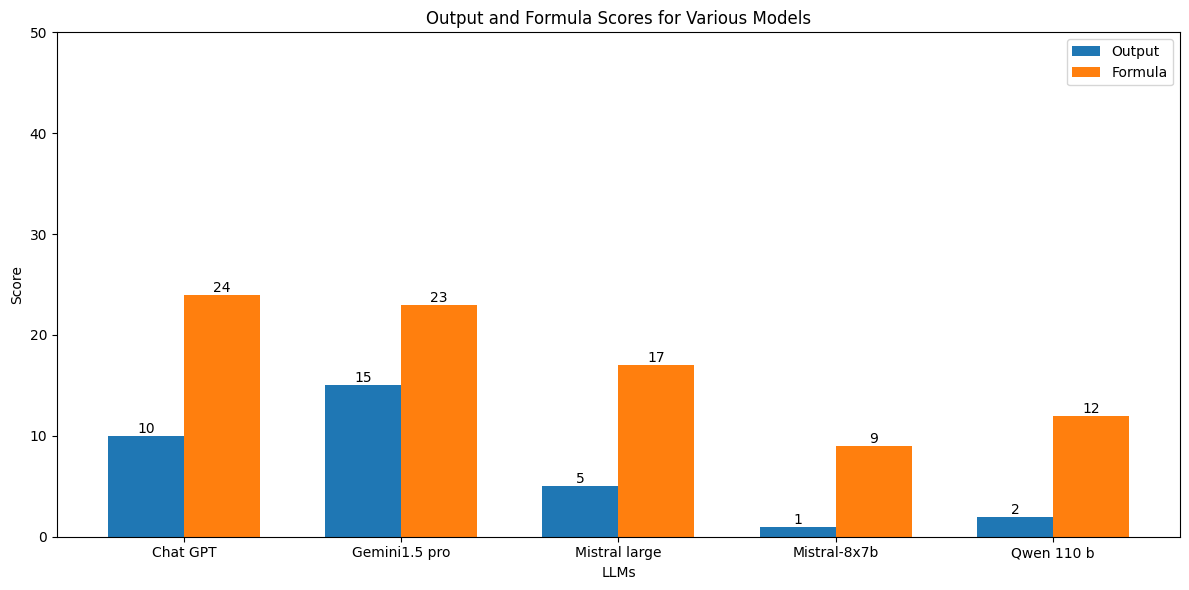

In [15]:
import numpy as np
# Graph Parameters
fig, ax = plt.subplots(figsize=(12, 6))  # Set the figure size to be presentable in a research paper
ax.set(ylim=(0, 50))  # Set the y-axis limit with max score as 50

# Define the models and their corresponding outputs and formulas
langs = ['Chat GPT', 'Gemini1.5 pro', 'Mistral large', 'Mistral-8x7b', 'Qwen 110 b']
output_chatgpt_sum = df[chatgpt[0]].sum()
output_gemini_sum = df[gemini[0]].sum()
output_mistral_large_sum = df[mistral_large[0]].sum()
output_mistral_8x7b_sum = df[mistral_8x7b[0]].sum()
output_qwen_110b_sum = df[qwen_110b[0]].sum()

formula_chatgpt_sum = df[chatgpt[1]].sum()
formula_gemini_sum = df[gemini[1]].sum()
formula_mistral_large_sum = df[mistral_large[1]].sum()
formula_mistral_8x7b_sum = df[mistral_8x7b[1]].sum()
formula_qwen_110b_sum = df[qwen_110b[1]].sum()

output_scores = [output_chatgpt_sum, output_gemini_sum, output_mistral_large_sum, output_mistral_8x7b_sum, output_qwen_110b_sum]
formula_scores = [formula_chatgpt_sum, formula_gemini_sum, formula_mistral_large_sum, formula_mistral_8x7b_sum, formula_qwen_110b_sum]

# X-axis setup
bar_width = 0.35  # Width of the bars
index = np.arange(len(langs))  # Set up the position for each group of bars

# Create the bars for Output and Formula
bars1 = ax.bar(index, output_scores, bar_width, label='Output')
bars2 = ax.bar(index + bar_width, formula_scores, bar_width, label='Formula')

# Set the title, labels, and tick positions
ax.set(title='Output and Formula Scores for Various Models', xlabel='LLMs', ylabel='Score')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(langs)

# Add the scores on top of each bar
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Add the legend and display the graph
ax.legend()
plt.tight_layout()
plt.show()


<Figure size 2000x1500 with 0 Axes>

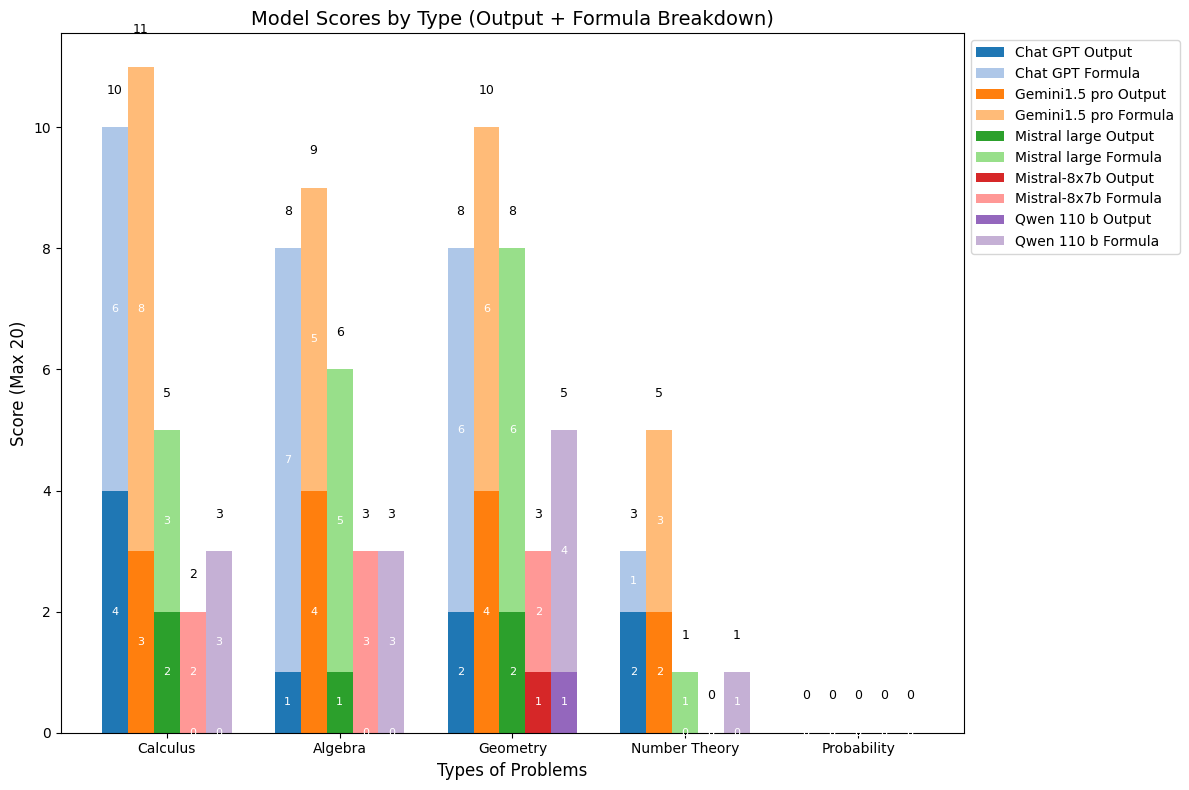

In [21]:
# Assuming 'df' is your dataset DataFrame with columns: 'Type', 'Output', 'Formula', etc.
plt.figure(figsize=(20, 15))
# Provided column names for output and formula
output_col = ['Output(Chat-gpt)', 'Output(Gemini1.5 pro)', 'Output(Mistral large)', 'Output(Mistral-8x7b)', 'Output(Qwen 110 b)']
formula_col = ['Formula(Chat GPT)', 'Formula(Gemini1.5 pro)', 'Formula(Mistral large)', 'Formula(Mistral-8x7b)', 'Formula(Qwen 110 b)']

# Models (based on the columns provided)
models = ['Chat GPT', 'Gemini1.5 pro', 'Mistral large', 'Mistral-8x7b', 'Qwen 110 b']

# Types of problems (extracted from the 'Type' column)
types = ['Calculus', 'Algebra', 'Geometry', 'Number Theory', 'Probability']

# Step 1: Prepare a data structure for the output and formula scores for each model and type
output_scores = {model: [] for model in models}
formula_scores = {model: [] for model in models}

# Step 2: Loop through each model and type to calculate the sum of 'Output' and 'Formula' scores
for i, model in enumerate(models):
    output_column = output_col[i]
    formula_column = formula_col[i]
    
    for type_ in types:
        # Filter the DataFrame by type
        model_data = df[df['Type'] == type_]
        
        # Sum the output and formula scores for this type and model
        output_sum = model_data[output_column].sum() if not model_data[output_column].isnull().all() else 0
        formula_sum = model_data[formula_column].sum() if not model_data[formula_column].isnull().all() else 0
        
        # Append the sums to the respective model's list
        output_scores[model].append(output_sum)
        formula_scores[model].append(formula_sum)

# X-axis setup
index = np.arange(len(types))  # Set up the position for each type
bar_width = 0.15  # Width of the bars

# Set color schemes for better visualization
colors_output = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
colors_formula = ['#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5']

# Step 3: Create the figure and plot the stacked bars
fig, ax = plt.subplots(figsize=(12, 8))

# Loop over each model and plot the stacked bars
for i, model in enumerate(models):
    output_vals = output_scores[model]
    formula_vals = formula_scores[model]

    # Plot the Output (bottom bar)
    bars_output = ax.bar(index + i * bar_width, output_vals, bar_width, label=f'{model} Output', color=colors_output[i])

    # Plot the Formula (stacked on top of Output)
    bars_formula = ax.bar(index + i * bar_width, formula_vals, bar_width, bottom=output_vals, label=f'{model} Formula', color=colors_formula[i])

    # Add the scores on top of each stacked bar
    for j in range(len(types)):
        total_score = output_vals[j] + formula_vals[j]  # Total score (output + formula)
        ax.text(index[j] + i * bar_width, total_score + 0.5, str(total_score), ha='center', va='bottom', fontsize=9)  # Total score
        ax.text(index[j] + i * bar_width, output_vals[j] / 2, str(output_vals[j]), ha='center', va='center', fontsize=8, color='white')  # Output score
        ax.text(index[j] + i * bar_width, output_vals[j] + formula_vals[j] / 2, str(formula_vals[j]), ha='center', va='center', fontsize=8, color='white')  # Formula score

# Set the title, labels, and tick positions
ax.set_title('Model Scores by Type (Output + Formula Breakdown)', fontsize=14)
ax.set_xlabel('Types of Problems', fontsize=12)
ax.set_ylabel('Score (Max 20)', fontsize=12)
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(types, fontsize=10)

# Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the graph
plt.tight_layout()
plt.show()
